In [1]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data

--2022-03-18 13:40:07--  https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.98
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/octet-stream]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-03-18 13:40:07 (165 MB/s) - ‘iris.data’ saved [4551/4551]



In [2]:
import pandas as pd
import numpy as np

In [4]:
path="iris.data"
df = pd.read_csv(path,header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.columns =["sepal lenght", "sepal width", "petal lenght", "petal width","class"]
df

,sepal lenght,sepal width,petal lenght,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal lenght  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal lenght  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal lenght,sepal width,petal lenght,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.describe().T #trasposta, gira righe e colonna

,count,mean,std,min,25%,50%,75%,max
sepal lenght,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal lenght,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [11]:
df.groupby("class").count() #per vedere il bilanciamento del target

,sepal lenght,sepal width,petal lenght,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


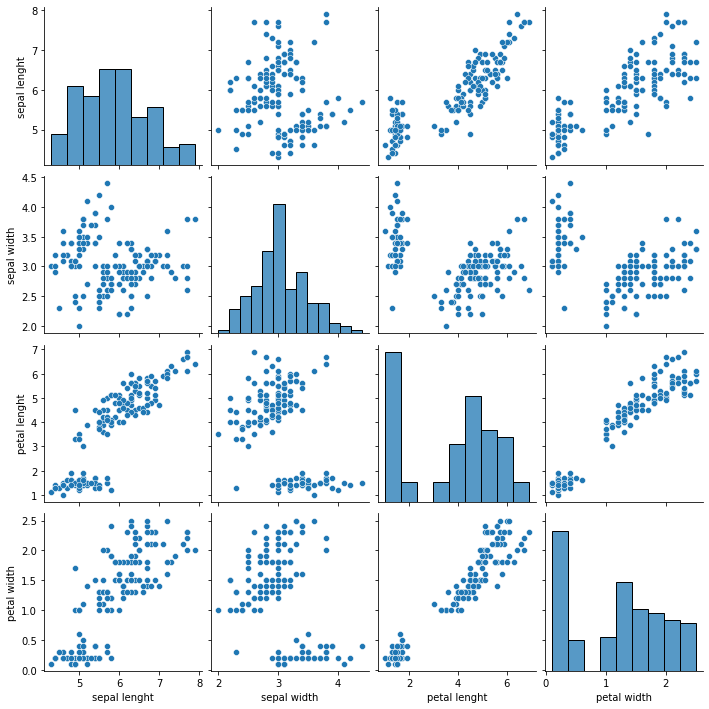

In [12]:
import seaborn as sns
sns.pairplot(df)

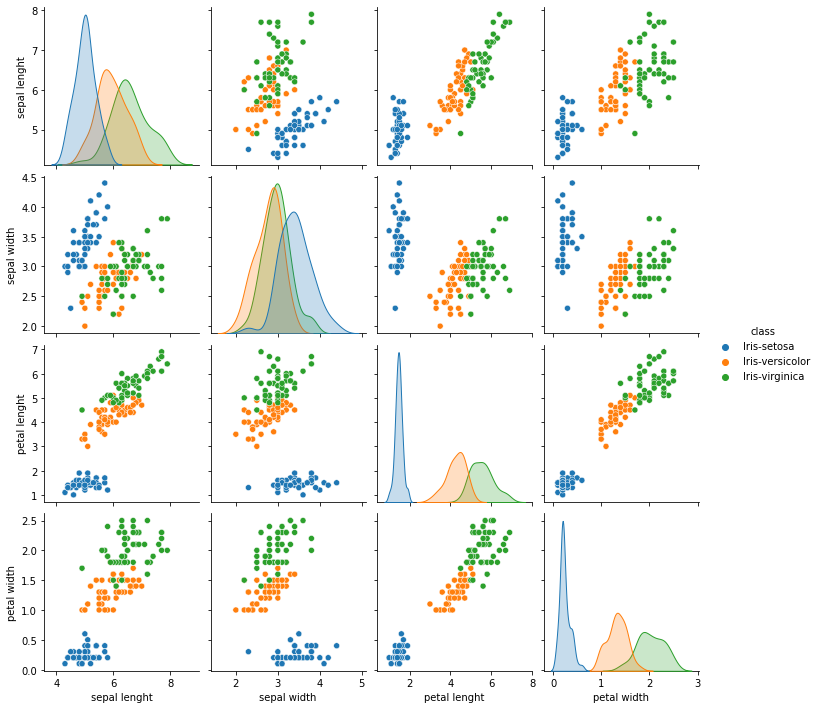

In [13]:
sns.pairplot(df,hue="class")#cosi guardo la distinzione delle classi

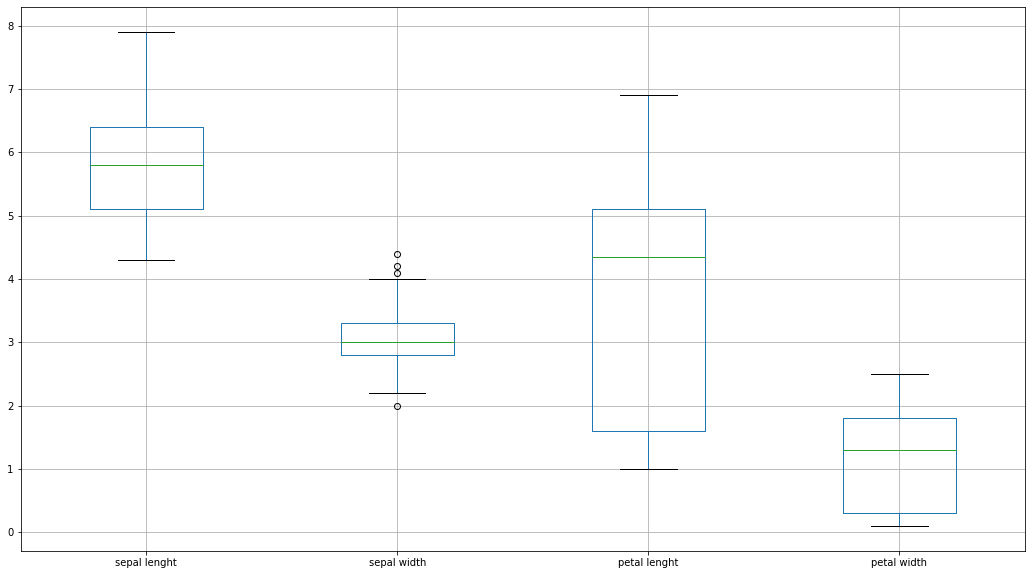

In [18]:
df.boxplot(figsize=(18,10)) # la verde è  la mediana


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2284cb3f90>,
      dtype=object)

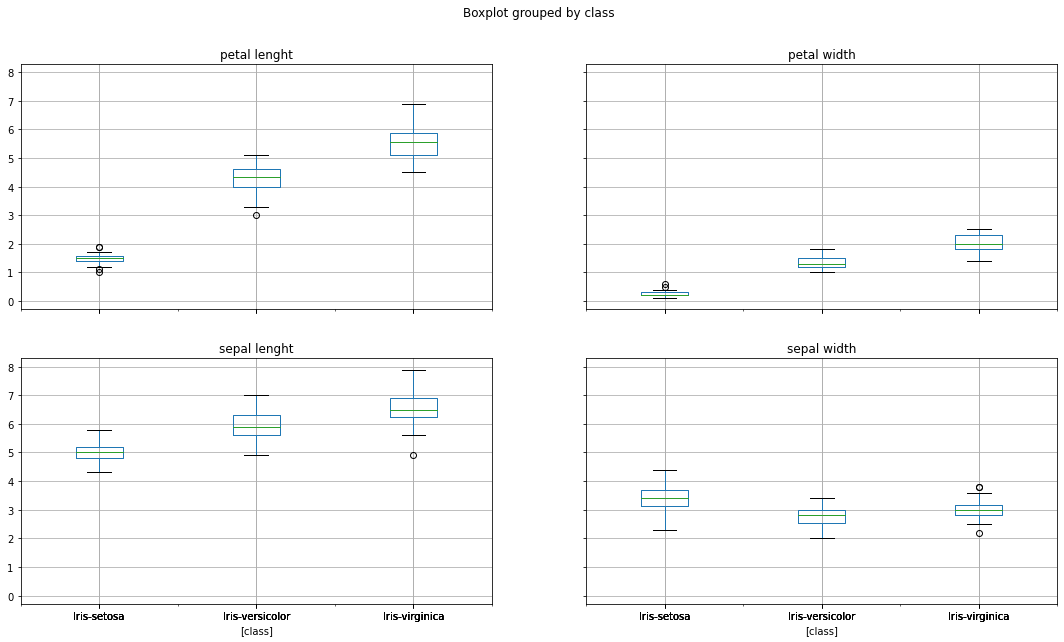

In [29]:
df.boxplot(by = "class", figsize=(18,10))

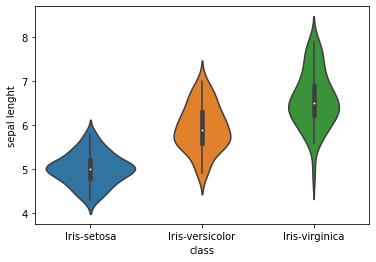

In [25]:
sns.violinplot(x="class",y="sepal lenght",data=df)

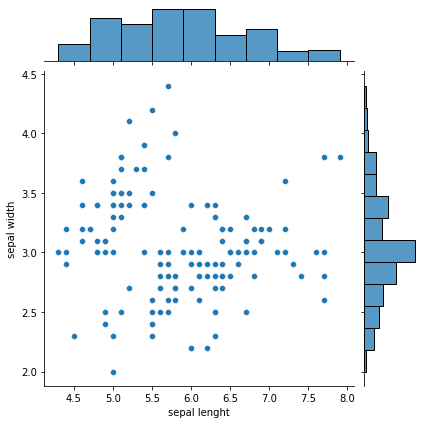

In [27]:
sns.jointplot(x="sepal lenght",y="sepal width",data=df)

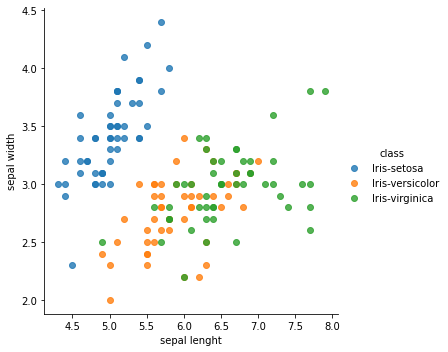

In [32]:
sns.lmplot(x="sepal lenght",y="sepal width",hue= "class",data=df,fit_reg=False)

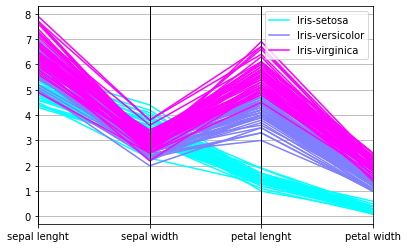

In [37]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df,"class",colormap="cool")

In [38]:
from sklearn.linear_model import LogisticRegression

In [40]:
model =LogisticRegression()

In [39]:
X = df.drop("class", axis=1)

In [41]:
y =df["class"]

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=667)